## 微分

関数 $f(x)$ を微分するとは

$$
f'(x)=\lim_{\Delta x\to0}\frac{f(x + \Delta x) - f(x)}{\Delta x}  \tag{1.1}
$$

と定義される。

初等関数については、式(1.1)から導かれた公式があり簡単に微分の導関数を求めることができる。

たとえば、関数
$$
f(x) = x^2 + 3x + 5  \tag{1.2}
$$
を微分すると
$$
f'(x) = 2x + 3 \tag{1.3}
$$
となる。
関数 $fx)$ を図にすると以下のようになる。

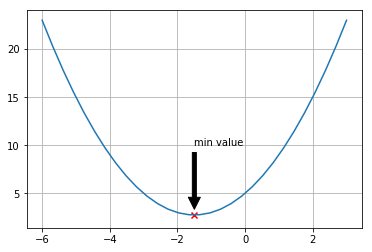

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(-6,3,30)
y =  x**2 + 3*x + 5
plt.plot( x, y)
plt.scatter(-1.5,2.75,marker="x",c="r")
plt.annotate('min value', xy=(-1.5, 3), xytext=(-1.5, 10),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()

式 (1.2) の関数の極小値を取る $x$の値求めたい場合は、<br>
式 (1.3)が関数 $f(x)$ の接線の傾きを表しているので、接線の傾きが $0$となる　$x$ を求めれば良い。

式(1.3)より

$
\begin{align}
0 &= 2x+3 \\
x &= -1.5
\end{align}
$
と直ちに解が求まる。これおを　**解析解** と言う。


In [2]:
def func(x):
    return x**2 + 3*x + 5

In [13]:
func(-1.5)

2.75

## 数値微分
微分の公式により、容易に解が求まる導関数に展開できれば解析的に解くことができます。<br>
機械学習で出てくる関数は解析的に解けない場合が多いのです。<br>
微分には、式(1.1)を使って微分を行います。

式(1.1)より微少な$\Delta x$ を設定し、プログラムで計算を行います。
式(1.2)の関数を例に考えます。

In [24]:
#関数 fx)を定義
def func(x):
    return x**2 + 3*x + 5

In [8]:
# 式(1.1) を計算する関数を定義

DELTA = 0.0001
def difference( func ,x):
    return (func(x + DELTA) - func(x))/DELTA

解析的に解く場合とほぼ同じ値が得られるます。

In [4]:
difference(func , 1) #x = 1 の場合は5

5.000099999996621

In [32]:
difference(func , -1.5) #x = 1 の場合は0

0.000100000003833145

このように計算することを　**数値微分** と言います。シュミレーションなどでは良く用いられています。

###  数値微分により微分方程式を解く

### 勾配法
微分の値（導関数）が接線の傾を表し、つまり関数の勾配(Gradient)を表しているので、その勾配の低い方へ少しずつ点を移動することで、
極小値を見つけようとする手法


更新式は以下で与えられる

$
x = x -\eta f'(x)
$

$\eta$ は学習率と呼ばれる微少な値

### 実装例

In [9]:
'''
1000回数値微分を計算し、
極小値を計算する。
'''
def gradient_desent(f, init_x, lr=0.01):
    x = init_x
    for i in range(1000):
        grad = difference(f,x) #数値微分を計算
        x -= lr * grad
    return x


In [10]:
def func(x):
    return x**2 + 3*x + 5

gradient_desent(func,init_x=2)


-1.5000499941104657

### 描画プログラム

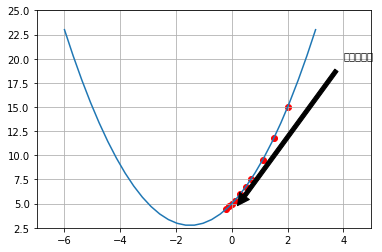

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(-6,3,30)
y =  x**2 + 3*x + 5
#plt.rcParams['font.family'] = 'IPAPGothic' 
#全体のフォントを設定
x2 = np.array([2,1.5,1.1,0.0,0.7,0.5,0.3,0.1,-0.1,-0.2])
y2 = x2**2 + 3*x2 + 5
plt.plot(x,y)
plt.xlim(-7,5)
plt.ylim(2.5,25)
plt.scatter(x2,y2,marker="o",c="r")
plt.annotate('勾配降下法', xy=(0, 4), xytext=(4, 20),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()

### 2変数の勾配降下法

勾配降下法を2変数の関数について考えると

$$
z = x^2 + y^2 \tag{1.4}
$$

x,yでそれぞれ偏微分する

$$
\frac{\partial z}{\partial x} = 2x
$$
$$
\frac{\partial z}{\partial y} = 2y
$$

勾配降下法の更新式は以下のようになる。

$$
x = x -\eta \frac{\partial z}{\partial x}
$$
$$
y = y -\eta \frac{\partial z}{\partial y}
$$

すり鉢の底へ向かって最小値を計算していくイメージである。

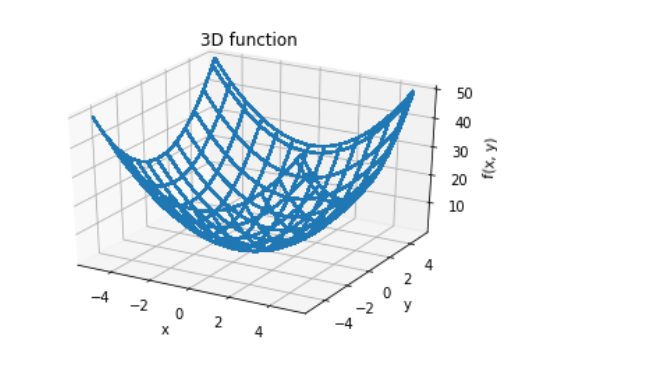

### 偏微分の勾配降下法

Text(0.5,0.92,'3D function')

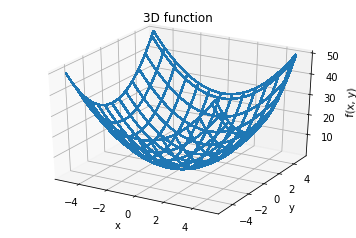

In [67]:
import numpy as np
#from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def func(x,y):
    return x**2 + y**2

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
xg, yg = np.meshgrid(x, y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(xg, yg, func(xg, yg), rstride=4, cstride=4,
                         antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D function')

In [20]:
# 式(1.1) を計算する関数を定義

def func2(x):
    return x[0]**2 + x[1]**2


DELTA = 0.0001
def difference2( func ,x):
    grad = np.zeros_like(x)
    #数値微分
    grad[0] = (func2([x[0] + DELTA,x[1]]) - func(x))/DELTA
    grad[1] = (func2([x[0],x[1]+DELTA]) - func(x))/DELTA
                      
    return grad

In [21]:
X= difference2(func2,[3.0,4.0])

In [22]:
def gradient_desent2(f, init_x, lr=0.01):
    x = init_x
    for i in range(1000):
        grad = difference2(func2,x)
        x[0] -= lr * grad[0]
        x[1] -= lr * grad[1]
        
    return x


In [23]:
T = gradient_desent2(func2,init_x=[2,3])
T

[-4.999663397941988e-05, -4.999495101206267e-05]

#### 参考　勾配を表すグラフの表示

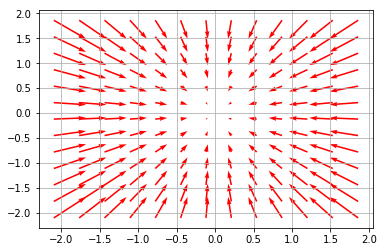

In [15]:
#勾配の傾きを表示するグラフ
import numpy as np
import matplotlib.pyplot as plt

plt.figure()


X, Y= np.meshgrid(np.arange(-2.1, 2.1, 0.33), np.arange(-2.1, 2.1,0.33))  # メッシュ生成



X1,Y1=0,0   

# ベクトル関数 
U = -2*X
V = -2*Y

plt.quiver(X,Y,U,V,color='red',angles='xy',scale_units='xy', scale=10.0) # ベクトル場をプロット


# グラフ描画
plt.grid()
plt.draw()
plt.show()